## 4장

In [14]:
import pandas as pd

In [15]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [16]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [17]:
fish_input = fish[['Weight', 'Length', 'Diagonal','Height', 'Width']].to_numpy()

In [18]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [19]:
fish_target = fish['Species'].to_numpy()

In [20]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(fish_input, fish_target, random_state=42)

In [21]:
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss = StandardScaler()

In [24]:
ss.fit(train_input)

StandardScaler()

In [25]:
train_scaled = ss.transform(train_input)

In [26]:
test_scaled = ss.transform(test_input)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
kn = KNeighborsClassifier(n_neighbors=3)

In [29]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

In [30]:
print(kn.score(train_scaled, train_target))

0.8907563025210085


C:\Users\dbwld\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:
print(kn.score(train_scaled, test_target))

C:\Users\dbwld\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


ValueError: Found input variables with inconsistent numbers of samples: [40, 119]

In [32]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [33]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [34]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


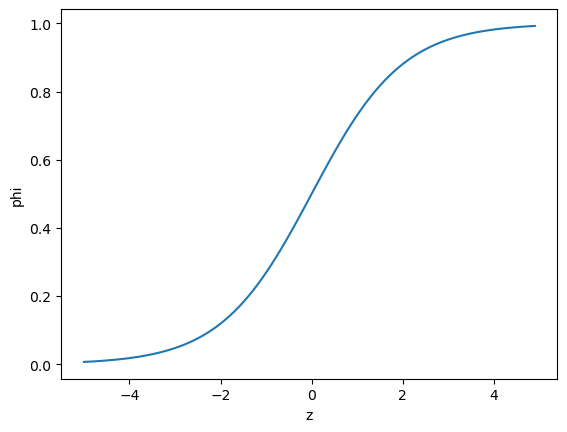

In [35]:
import numpy as np
import matplotlib.pyplot as plt
z= np.arange(-5,5, 0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [36]:
bream_smelt_indexes = (train_target=='Bream')| (train_target=='Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [38]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [39]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


### 로지스틱 회귀로 다중 분류 수행하기

In [40]:
print(lr.predict(test_scaled[:5]))

['Smelt' 'Smelt' 'Bream' 'Bream' 'Smelt']


In [41]:
lr=LogisticRegression(C=20, max_iter=1000)

In [42]:
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [43]:
proba = lr.predict_proba(test_scaled[:5])

In [44]:
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [45]:
decision=lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [46]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


### SGD Classifier

In [47]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [48]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [49]:
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [50]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)

In [52]:
test_scaled = ss.transform(test_input)

In [53]:
from sklearn.linear_model import SGDClassifier

In [54]:
sc = SGDClassifier(max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8067226890756303
0.875


C:\Users\dbwld\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## Issue: log_loss is not supported

In [55]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))

0.7647058823529411


In [56]:
sc = SGDClassifier(random_state=42)

In [57]:
classes= np.unique(train_target)

In [58]:
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [59]:
train_score=[]
test_score=[]
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

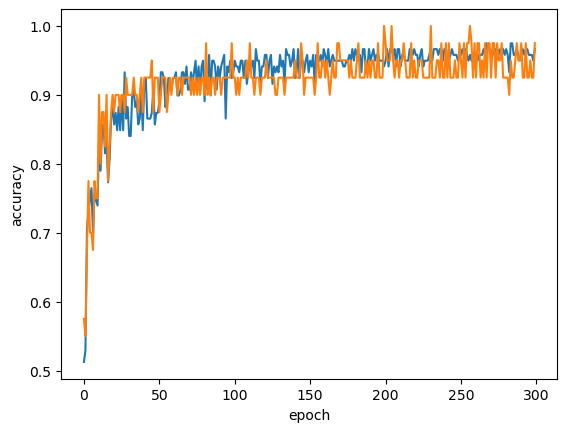

In [60]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [61]:
sc= SGDClassifier(max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(max_iter=100, random_state=42, tol=None)

In [62]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


In [63]:
sc= SGDClassifier(loss='hinge',max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(max_iter=100, random_state=42, tol=None)

In [64]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


## 5장.결정트리

In [65]:
import pandas as pd

In [66]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [67]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [68]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [69]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [70]:
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [71]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target= wine['class'].to_numpy()


In [72]:
train_input, test_input, train_target, test_target=train_test_split(data, target, test_size=0.2,random_state=42)

In [73]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [74]:
ss.fit(train_input)

StandardScaler()

In [75]:
train_scaled = ss.transform(train_input)

In [76]:
test_scaled = ss.transform(test_input)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lr = LogisticRegression()

In [80]:
lr.fit(train_scaled, train_target)

LogisticRegression()

In [81]:
print(lr.score(train_scaled, train_target))

0.7808350971714451


In [82]:
print(lr.score(test_scaled, test_target))

0.7776923076923077


In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dt = DecisionTreeClassifier(random_state=42)

In [85]:
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [86]:
print(dt.score(train_scaled, train_target))

0.996921300750433


In [87]:
print(dt.score(test_scaled, test_target))

0.8592307692307692


In [88]:
import matplotlib.pyplot as plt

In [89]:
from sklearn.tree import plot_tree

In [90]:
plt.figure(figsize=(10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

[Text(0.6076222132082433, 0.9772727272727273, 'X[1] <= -0.239\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(0.2956869355618141, 0.9318181818181818, 'X[1] <= -0.802\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(0.05751066521865647, 0.8863636363636364, 'X[1] <= -0.854\ngini = 0.184\nsamples = 1054\nvalue = [108, 946]'),
 Text(0.006651147322913203, 0.8409090909090909, 'X[2] <= 3.966\ngini = 0.032\nsamples = 555\nvalue = [9, 546]'),
 Text(0.005320917858330562, 0.7954545454545454, 'X[2] <= -2.017\ngini = 0.025\nsamples = 553\nvalue = [7, 546]'),
 Text(0.002660458929165281, 0.75, 'X[2] <= -2.08\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.0013302294645826404, 0.7045454545454546, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.0039906883937479215, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.007981376787495843, 0.75, 'X[1] <= -0.896\ngini = 0.022\nsamples = 545\nvalue = [6, 539]'),
 Text(0.006651147322913203, 0.704545454545

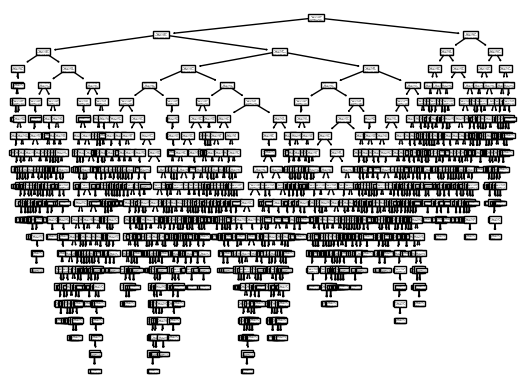

In [91]:
plot_tree(dt)

In [92]:
plt.show()

In [93]:
plt.figure(figsize = (10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

[Text(0.5, 0.8333333333333334, 'sugar <= -0.239\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(0.25, 0.5, 'sugar <= -0.802\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'sugar <= 0.204\ngini = 0.069\nsamples = 2275\nvalue = [81, 2194]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

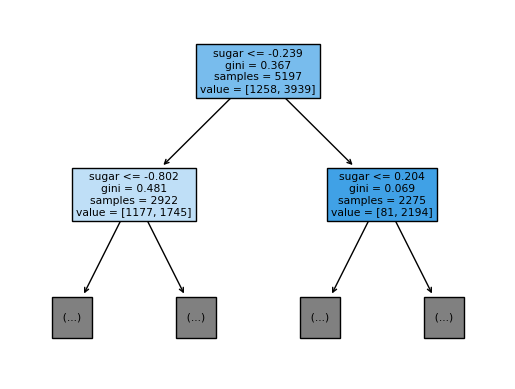

In [94]:
plot_tree(dt, max_depth = 1, filled=True, feature_names = ['alchol', 'sugar', 'PH'])

In [95]:
plt.show()

In [96]:
plt.figure(figsize = (20,15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

[Text(0.6076222132082433, 0.9772727272727273, 'sugar <= -0.239\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(0.2956869355618141, 0.9318181818181818, 'sugar <= -0.802\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(0.05751066521865647, 0.8863636363636364, 'sugar <= -0.854\ngini = 0.184\nsamples = 1054\nvalue = [108, 946]'),
 Text(0.006651147322913203, 0.8409090909090909, 'PH <= 3.966\ngini = 0.032\nsamples = 555\nvalue = [9, 546]'),
 Text(0.005320917858330562, 0.7954545454545454, 'PH <= -2.017\ngini = 0.025\nsamples = 553\nvalue = [7, 546]'),
 Text(0.002660458929165281, 0.75, 'PH <= -2.08\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.0013302294645826404, 0.7045454545454546, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.0039906883937479215, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.007981376787495843, 0.75, 'sugar <= -0.896\ngini = 0.022\nsamples = 545\nvalue = [6, 539]'),
 Text(0.006651147322913203, 0.70454545454545

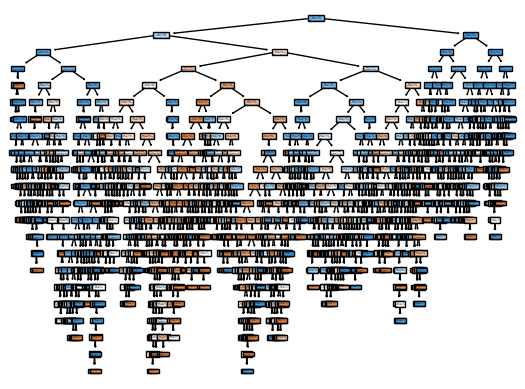

In [97]:
plot_tree(dt, filled=True, feature_names = ['alchol', 'sugar', 'PH',])

In [98]:
plt.show()

In [99]:
import pandas as pd

In [100]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [103]:
data=wine[['alcohol', 'sugar', 'pH']].to_numpy()

In [104]:
target = wine['class'].to_numpy()

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [107]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
dt = DecisionTreeClassifier(random_state=42)

In [110]:
dt.fit(sub_input, sub_target)

DecisionTreeClassifier(random_state=42)

In [111]:
print(dt.score(sub_input, sub_target))

0.9971133028626413


In [112]:
print(dt.score(val_input, val_target))

0.864423076923077


In [113]:
from sklearn.model_selection import cross_validate

In [114]:
scores = cross_validate(dt, train_input, train_target)

In [118]:
print(scores)

{'fit_time': array([0.01494002, 0.01550651, 0.00914192, 0.01693988, 0.0141778 ]), 'score_time': array([0.        , 0.00631261, 0.        , 0.        , 0.00046396]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [120]:
from sklearn.model_selection import StratifiedKFold

In [121]:
scores = cross_validate(dt, train_input, train_target, cv= StratifiedKFold())

In [122]:
print(np.mean(scores['test_score']))

0.855300214703487


In [123]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [125]:
scores= cross_validate(dt, train_input, train_target, cv=splitter)

In [126]:
print(np.mean(scores['test_score']))

0.8574181117533719


In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
params = {'min_impurity_decrease':[0.0001, 0.0002, 0.0003,0.0004, 0.0005]}

In [130]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=  -1)

In [131]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [132]:
dt = gs.best_estimator_

In [133]:
print(dt.score(train_input, train_target))

0.9615162593804117


In [134]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [135]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [136]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [137]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [138]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [139]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


In [140]:
from scipy.stats import uniform, randint

In [141]:
rgen = randint(0, 10)
rgen.rvs(10)

array([1, 5, 4, 4, 5, 6, 6, 5, 3, 4], dtype=int64)

In [142]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([114,  99,  96,  92,  93, 111,  96,  96,  98, 105], dtype=int64))

In [143]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.44517529, 0.62162842, 0.9837776 , 0.99804215, 0.04772882,
       0.85576893, 0.52185812, 0.87351078, 0.69482304, 0.63008086])

In [144]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [145]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000163C5AEE490>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000163C4A28E50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000163C5AA19A0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000163C4943490>},
                   random_state=42)

In [146]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [147]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [148]:
dt = gs.best_estimator_

print(dt.score(test_input, test_target))

0.86


### 5장-3

In [149]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [150]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [151]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [152]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


In [153]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [154]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [155]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [156]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [157]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68011572 0.16116151]


In [159]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [160]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [161]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [162]:
hgb.score(test_input, test_target)

0.8723076923076923

In [163]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686


In [165]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

ModuleNotFoundError: No module named 'lightgbm'